In [1]:
from notebook_helpers import *

In [2]:
project_path = Path(
    "/home/ediun/git/histalign/projects/project_310724_full/project.json"
)
alignment_directory = Path(
    "/home/ediun/git/histalign/projects/project_310724_full/7d9af388b0"
)

In [3]:
project_settings = load_project_settings(project_path)

atlas_slicer = VolumeSlicer(
    path=get_atlas_path(project_settings.resolution),
    resolution=project_settings.resolution,
    lazy=False,
)
atlas_volume_array = atlas_slicer.volume._volume.tonumpy()

In [4]:
plane_meshes = []

index = 0
for file in alignment_directory.iterdir():
    if re.fullmatch(ALIGNMENT_FILE_NAME_PATTERN, file.name) is None:
        continue

    index += 1
    print(f"\rComputing plane {index}", end="")

    alignment_settings = load_alignment_settings(file)

    histology_slice = load_image(alignment_settings.histology_path)

    registrator = Registrator(True, True)
    registered_slice = registrator.get_forwarded_image(
        histology_slice, alignment_settings
    )
    flattened_registered_slice = registered_slice.flatten()

    plane_mesh = atlas_slicer.slice(
        alignment_settings.volume_settings, return_mesh=True
    )
    plane_mesh.pointdata["ImageScalars"] = flattened_registered_slice

    plane_meshes.append(plane_mesh)

Computing plane 20

Computing plane 1
Created temp_volume in 0.06
Interpolated data in 3.53
Extracted temp_array in 0.00
Rounded data in 1.88
Took maximum of data in 0.06

Computing plane 2
Created temp_volume in 0.06
Interpolated data in 3.49
Extracted temp_array in 0.00
Rounded data in 0.69
Took maximum of data in 0.03

Computing plane 3
Created temp_volume in 0.06
Interpolated data in 3.55
Extracted temp_array in 0.00
Rounded data in 0.20
Took maximum of data in 0.06

Computing plane 4
Created temp_volume in 0.06
Interpolated data in 5.44
Extracted temp_array in 0.00
Rounded data in 0.26
Took maximum of data in 0.04

Computing plane 5
Created temp_volume in 0.06
Interpolated data in 5.45
Extracted temp_array in 0.00
Rounded data in 0.36
Took maximum of data in 0.06

Computing plane 6
Created temp_volume in 0.06
Interpolated data in 5.44
Extracted temp_array in 0.00
Rounded data in 0.18
Took maximum of data in 0.06

Computing plane 7
Created temp_volume in 0.06
Interpolated data in 5.39
Extracted temp_a


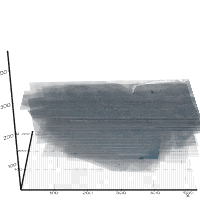

In [6]:
planes_volume = vedo.Volume(np.zeros_like(atlas_volume_array, dtype=np.uint16))
planes_volume.cmap(
    "Blues", alpha=[0, 1], vmin=0, vmax=np.iinfo(planes_volume.tonumpy().dtype).max
)

planes_volume_array = planes_volume.tonumpy()

for index, mesh in enumerate(plane_meshes):
    print(f"Computing plane {index + 1}")

    start_time = time.perf_counter()
    temp_volume = vedo.Volume(np.zeros_like(atlas_volume_array))
    print(f"Created temp_volume in {time.perf_counter() - start_time:.2f}")
    start_time = time.perf_counter()
    temp_volume.interpolate_data_from(mesh, radius=1)
    print(f"Interpolated data in {time.perf_counter() - start_time:.2f}")

    start_time = time.perf_counter()
    temp_array = temp_volume.tonumpy()
    print(f"Extracted temp_array in {time.perf_counter() - start_time:.2f}")
    start_time = time.perf_counter()
    temp_array = np.round(temp_array).astype(np.uint16)
    print(f"Rounded data in {time.perf_counter() - start_time:.2f}")

    start_time = time.perf_counter()
    planes_volume_array[:] = np.maximum(planes_volume_array, temp_array)
    print(f"Took maximum of data in {time.perf_counter() - start_time:.2f}")

    print()

planes_volume.modified()

In [7]:
show(planes_volume)